# Serving Inference

## Get some random samples based on the training data

In [1]:
from clearml import Dataset
from pathlib import Path

import sys
sys.path.append('..')
import global_config

dataset = Dataset.get(
    dataset_project=global_config.PROJECT_NAME,
    dataset_name='raw_asteroid_dataset',
)
local_folder = dataset.get_local_copy()
data_path = Path(local_folder) / 'nasa.csv'

In [2]:
import pandas as pd
df = pd.read_csv(data_path)

In [3]:
df

,Unnamed: 0,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,year
0,0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1,2021
1,1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0,2021
2,2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1,2021
3,3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0,2021
4,4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,...,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,0,2022
4683,4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,...,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,0,2022
4684,4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,...,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,0,2022
4685,4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,...,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,0,2022


In [6]:
import requests
import time
import random

for i in range(100):
    response = requests.post(
        url='http://127.0.0.1:8080/serve/asteroid_canary',
        headers={'accept': 'application/json', 'Content-Type': 'application/json'},
        json=df.loc[0, df.columns!='Hazardous'].to_dict()
    )
    print(response.json(), response.status_code)
    # time.sleep(random.randint(0, 10) / 10)

{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 0.9999188184738159} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 0.9999188184738159} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.0000194311141968} 200
{'y': 1, 'y_raw': 1.00001943111419

# Generating new samples! And adding some drift while we're at it :D

In [7]:
import matplotlib.pyplot as plt
from distfit import distfit

dist = distfit(todf=True)

Absolute Magnitude
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0216699] [loc=21.773 scale=2.839]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.203308] [loc=11.160 scale=10.613]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.258616] [loc=-0.028 scale=11.188]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0276096] [loc=21.941 scale=2.553]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0216725] [loc=21.773 scale=2.838]
[distfit] >[genextreme] [0.05 sec] [RSS: 0.0136597] [loc=20.654 scale=2.631]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.0143701] [loc=6.706 scale=0.534]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 0.0139523] [loc=1.273 scale=20.306]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.0145191] [loc=7.281 scale=235.097]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.137565] [loc=11.160 scale=19.440]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.02216] [loc=-745.357 scale=106.225]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


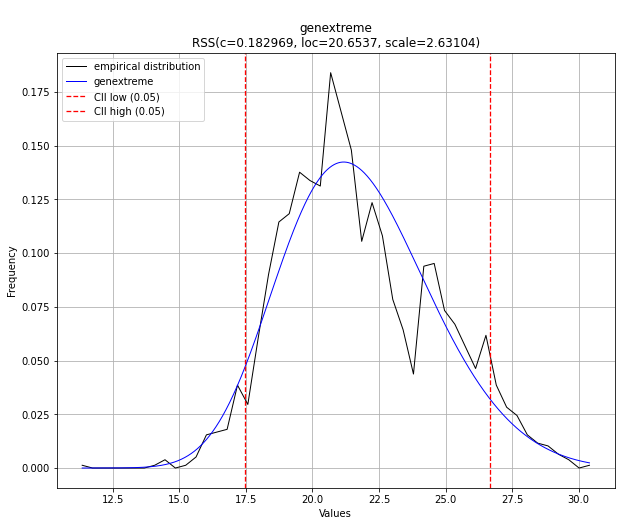

[distfit] >Generate 1000 genextreme distributed samples with fitted params (0.18296877758001756, 20.65369109130459, 2.6310421930690797).
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00541746] [loc=43.546 scale=5.677]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.050827] [loc=22.320 scale=21.226]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.0646486] [loc=-0.086 scale=22.406]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.00690225] [loc=43.882 scale=5.105]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0054175] [loc=43.547 scale=5.677]
[distfit] >[genextreme] [0.19 sec] [RSS: 0.00341501] [loc=41.307 scale=5.262]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.00359253] [loc=13.411 scale=1.067]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 0.00348807] [loc=2.546 scale=40.613]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.00362979] [loc=14.562 scale=470.193]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0343911] [loc=22.320 scale

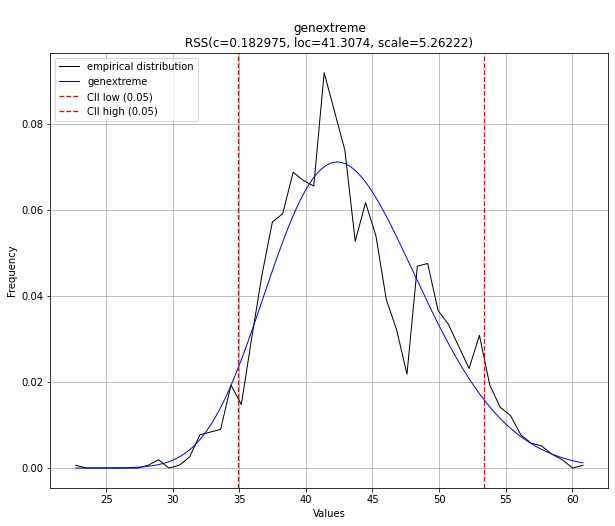

[distfit] >Generate 1000 genextreme distributed samples with fitted params (0.18297480224773785, 41.30743302749693, 5.262216377980138).
avg_dia
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.03294] [loc=0.396 scale=0.756]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0291045] [loc=0.003 scale=0.392]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.449767] [loc=-0.118 scale=0.121]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 0.0242123] [loc=0.206 scale=0.270]
[distfit] >[t         ] [0.02 sec] [RSS: 0.109485] [loc=0.215 scale=0.188]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.0704256] [loc=0.130 scale=0.148]
[distfit] >[gamma     ] [0.04 sec] [RSS: 2.22872] [loc=0.003 scale=1.537]
[distfit] >[lognorm   ] [0.02 sec] [RSS: 0.11483] [loc=-0.001 scale=0.193]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.114887] [loc=0.003 scale=267.242]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.30018] [loc=0.003 scale=25.205]
[distfit] 

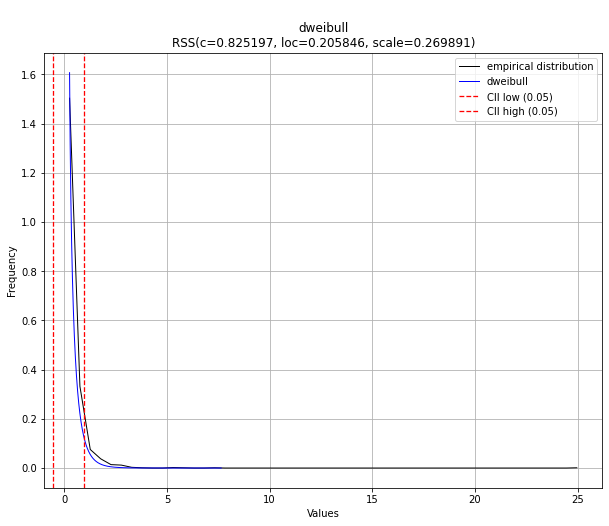

[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967694478369, 0.20584608750000002, 0.26989055872144674).
[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967694478369, 0.20584608750000002, 0.26989055872144674).
Relative Velocity km per hr
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.31448e-10] [loc=53111.777 scale=26845.734]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.57558e-09] [loc=3146.214 scale=49965.563]
[distfit] >[pareto    ] [0.03 sec] [RSS: 7.95778e-09] [loc=-9.857 scale=3156.071]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 1.59346e-10] [loc=50095.902 scale=22409.085]
[distfit] >[t         ] [0.05 sec] [RSS: 2.31422e-10] [loc=53110.905 scale=26845.973]
[distfit] >[genextreme] [0.19 sec] [RSS: 7.32093e-11] [loc=40918.652 scale=21406.419]
[distfit] >[gamma     ] [0.01 sec] [RSS: 6.19742e-11] [loc=-2415.026 scale=13183.479]
[distfit]

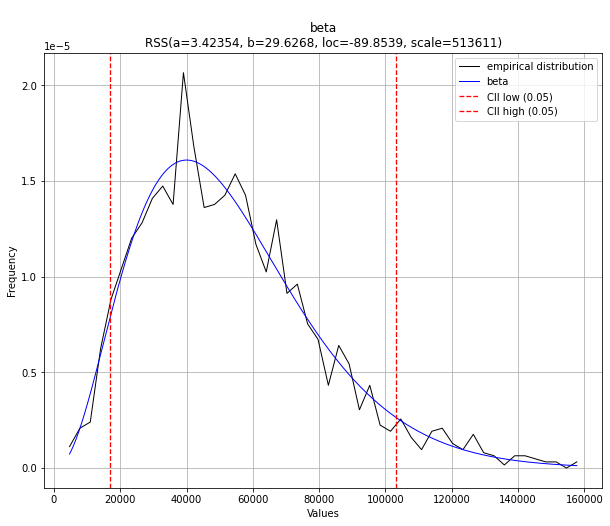

[distfit] >Generate 1000 beta distributed samples with fitted params (3.4235350498344985, 29.62678783558439, -89.85394649893807, 513610.56975493766).
[distfit] >Generate 1000 beta distributed samples with fitted params (3.4235350498344985, 29.62678783558439, -89.85394649893807, 513610.56975493766).
Miss Dist.(kilometers)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.34938e-15] [loc=41545402.090 scale=20740770.573]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.89301e-15] [loc=270537.781 scale=41274864.309]
[distfit] >[pareto    ] [0.04 sec] [RSS: 3.14061e-14] [loc=-599.238 scale=271137.019]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 1.5317e-15] [loc=38377267.414 scale=20154481.491]
[distfit] >[t         ] [0.05 sec] [RSS: 4.07391e-15] [loc=-103378.926 scale=46480918.939]
[distfit] >[genextreme] [0.07 sec] [RSS: 8.52914e-16] [loc=37357978.925 scale=23118707.226]
[distfit] >[gamma     ] [0.05 sec] [RSS: 1.

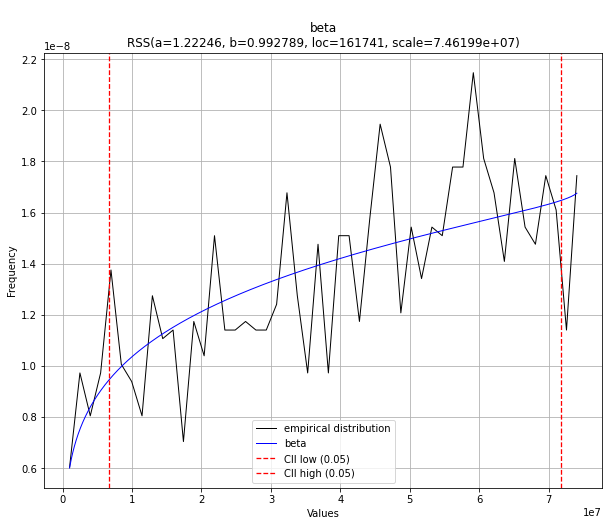

[distfit] >Generate 1000 beta distributed samples with fitted params (1.22246284956521, 0.9927888251810086, 161740.87297095452, 74619859.12702906).
[distfit] >Generate 1000 beta distributed samples with fitted params (1.22246284956521, 0.9927888251810086, 161740.87297095452, 74619859.12702906).
Orbit Uncertainity
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 5.22311] [loc=2.844 scale=2.863]
[distfit] >[expon     ] [0.00 sec] [RSS: 4.61117] [loc=0.000 scale=2.844]
[distfit] >[pareto    ] [0.02 sec] [RSS: 3.78885] [loc=-1.197 scale=1.197]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 5.06914] [loc=1.839 scale=2.793]
[distfit] >[t         ] [0.05 sec] [RSS: 5.2231] [loc=2.843 scale=2.863]
[distfit] >[genextreme] [0.17 sec] [RSS: 3.88134] [loc=0.571 scale=4.191]
[distfit] >[gamma     ] [0.05 sec] [RSS: 2.70742] [loc=-0.000 scale=2.803]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 3.49525] [loc=-0.000 scale=0.037]

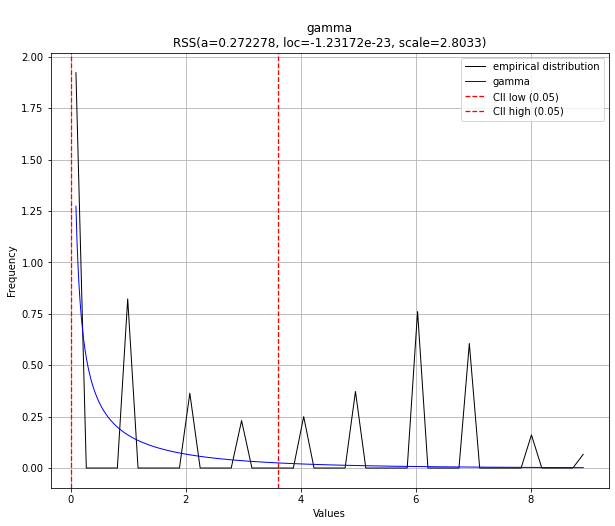

[distfit] >Generate 1000 gamma distributed samples with fitted params (0.2722781811394939, -1.2317219509025392e-23, 2.80330409152972).
[distfit] >Generate 1000 gamma distributed samples with fitted params (0.2722781811394939, -1.2317219509025392e-23, 2.80330409152972).
Minimum Orbit Intersection
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 398.928] [loc=0.085 scale=0.093]
[distfit] >[expon     ] [0.00 sec] [RSS: 78.0115] [loc=0.000 scale=0.085]
[distfit] >[pareto    ] [0.03 sec] [RSS: 21.6139] [loc=-0.133 scale=0.133]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 342.891] [loc=0.059 scale=0.069]
[distfit] >[t         ] [0.02 sec] [RSS: 295.023] [loc=0.049 scale=0.050]
[distfit] >[genextreme] [0.06 sec] [RSS: 64.952] [loc=0.027 scale=0.034]
[distfit] >[gamma     ] [0.04 sec] [RSS: 30.467] [loc=0.000 scale=0.078]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 21.3677] [loc=-0.002 scale=0.043]
[distfit] >[beta   

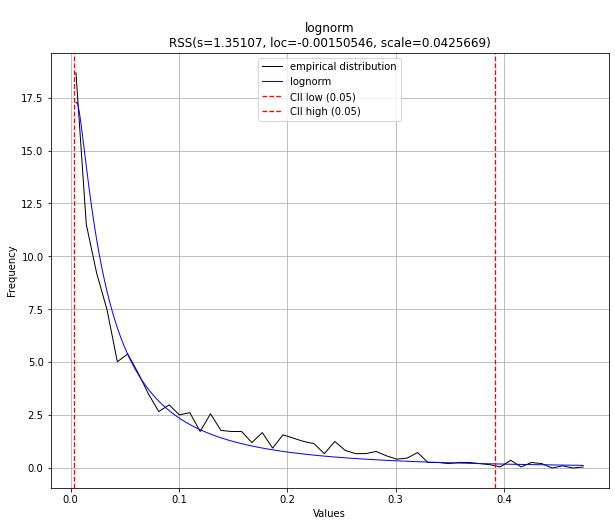

[distfit] >Generate 1000 lognorm distributed samples with fitted params (1.3510665071402852, -0.0015054603474219802, 0.04256693496442441).
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 99.732] [loc=0.169 scale=0.185]
[distfit] >[expon     ] [0.00 sec] [RSS: 19.5029] [loc=0.000 scale=0.169]
[distfit] >[pareto    ] [0.04 sec] [RSS: 38.8711] [loc=-0.006 scale=0.006]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 85.7228] [loc=0.119 scale=0.139]
[distfit] >[t         ] [0.02 sec] [RSS: 73.7561] [loc=0.097 scale=0.100]
[distfit] >[genextreme] [0.05 sec] [RSS: 16.2357] [loc=0.054 scale=0.067]
[distfit] >[gamma     ] [0.04 sec] [RSS: 7.61676] [loc=0.000 scale=0.156]
[distfit] >[lognorm   ] [0.07 sec] [RSS: 5.3423] [loc=-0.003 scale=0.085]
[distfit] >[beta      ] [0.07 sec] [RSS: 6.01891] [loc=0.000 scale=1.045]
[distfit] >[uniform   ] [0.00 sec] [RSS: 139.103] [loc=0.000 scale=0.956]
[distfit] >[loggamma  ] [0.05

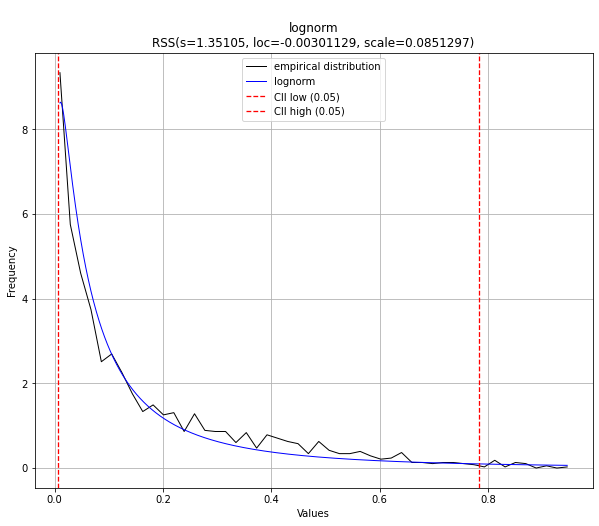

[distfit] >Generate 1000 lognorm distributed samples with fitted params (1.3510520389821006, -0.003011294478516807, 0.08512974683265472).
Jupiter Tisserand Invariant
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.116538] [loc=5.234 scale=1.234]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.901784] [loc=2.371 scale=2.863]
[distfit] >[pareto    ] [0.02 sec] [RSS: 1.50441] [loc=-0.002 scale=2.373]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.153651] [loc=5.256 scale=1.122]
[distfit] >[t         ] [0.05 sec] [RSS: 0.116539] [loc=5.235 scale=1.234]
[distfit] >[genextreme] [0.05 sec] [RSS: 0.11049] [loc=4.792 scale=1.227]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.118806] [loc=-71.131 scale=0.020]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.119439] [loc=-103.845 scale=109.070]
[distfit] >[beta      ] [0.04 sec] [RSS: 0.104038] [loc=2.256 scale=6.882]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.590278] [loc=2.371

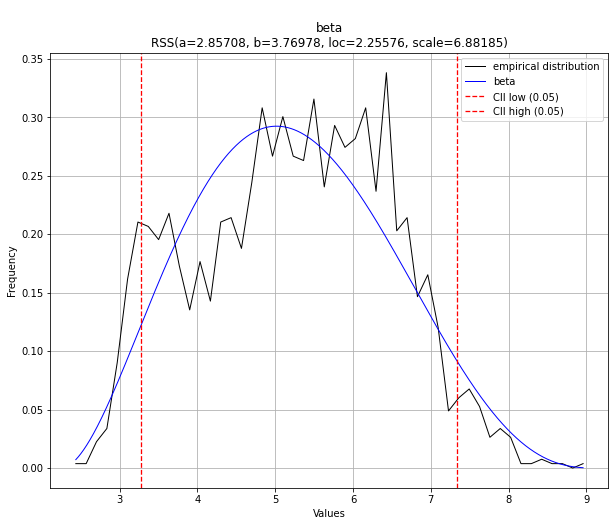

[distfit] >Generate 1000 beta distributed samples with fitted params (2.857080100289421, 3.7697796167799558, 2.255760161306735, 6.881845905407813).
[distfit] >Generate 1000 beta distributed samples with fitted params (2.857080100289421, 3.7697796167799558, 2.255760161306735, 6.881845905407813).
Epoch Osculation
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.01196e-05] [loc=2457738.507 scale=1067.430]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.32238e-05] [loc=2450164.500 scale=7574.007]
[distfit] >[pareto    ] [0.07 sec] [RSS: 3.32249e-05] [loc=-73.221 scale=2450237.721]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 2.66637e-05] [loc=2458000.500 scale=832.075]
[distfit] >[t         ] [0.05 sec] [RSS: 3.34106e-05] [loc=2453528.911 scale=63159.524]
[distfit] >[genextreme] [0.13 sec] [RSS: 1.1526e-05] [loc=2457754.661 scale=329.382]
[distfit] >[gamma     ] [0.06 sec] [RSS: 3.34887e-05] [loc=2457600.500 scale

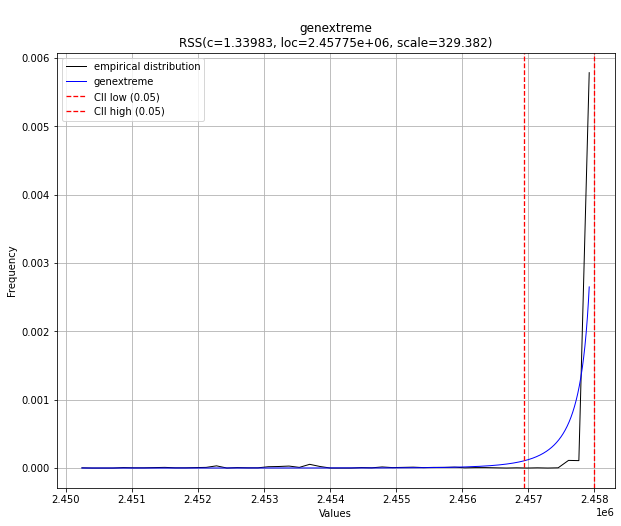

[distfit] >Generate 1000 genextreme distributed samples with fitted params (1.3398306584897095, 2457754.661401299, 329.3820915799782).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (1.3398306584897095, 2457754.661401299, 329.3820915799782).
Eccentricity
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.64119] [loc=0.382 scale=0.177]
[distfit] >[expon     ] [0.00 sec] [RSS: 40.6413] [loc=0.013 scale=0.369]
[distfit] >[pareto    ] [0.02 sec] [RSS: 53.9362] [loc=-0.496 scale=0.509]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 4.03451] [loc=0.364 scale=0.158]
[distfit] >[t         ] [0.05 sec] [RSS: 3.64047] [loc=0.382 scale=0.177]
[distfit] >[genextreme] [0.04 sec] [RSS: 2.83221] [loc=0.311 scale=0.163]
[distfit] >[gamma     ] [0.03 sec] [RSS: 2.84545] [loc=-0.255 scale=0.050]
[distfit] >[lognorm   ] [0.04 sec] [RSS: 2.97512] [loc=-0.655 scale=1.022]
[distfit] >[beta      ] [0.01 

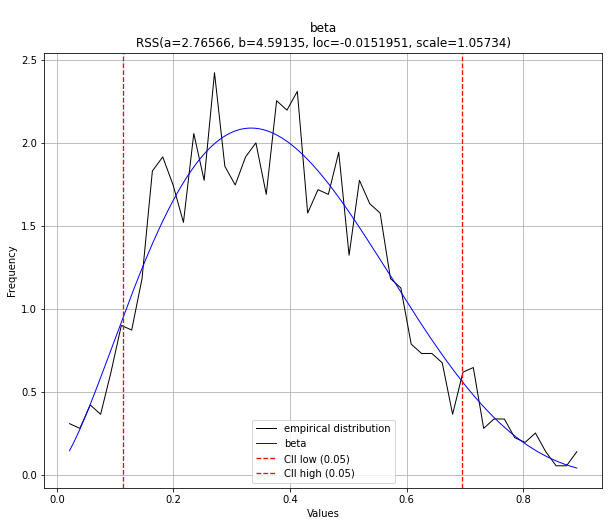

[distfit] >Generate 1000 beta distributed samples with fitted params (2.765662760025063, 4.591345071464194, -0.01519505859864022, 1.0573357990978407).
[distfit] >Generate 1000 beta distributed samples with fitted params (2.765662760025063, 4.591345071464194, -0.01519505859864022, 1.0573357990978407).
Semi Major Axis
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 4.01661] [loc=1.326 scale=0.492]
[distfit] >[expon     ] [0.00 sec] [RSS: 5.30259] [loc=0.616 scale=0.710]
[distfit] >[pareto    ] [0.07 sec] [RSS: 5.33578] [loc=-9993405.394 scale=9993406.010]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 2.66673] [loc=1.212 scale=0.379]
[distfit] >[t         ] [0.04 sec] [RSS: 2.40911] [loc=1.198 scale=0.327]
[distfit] >[genextreme] [0.05 sec] [RSS: 0.432865] [loc=1.067 scale=0.286]
[distfit] >[gamma     ] [0.01 sec] [RSS: 1.05295] [loc=0.613 scale=0.306]
[distfit] >[lognorm   ] [0.02 sec] [RSS: 0.480637] [loc=0.

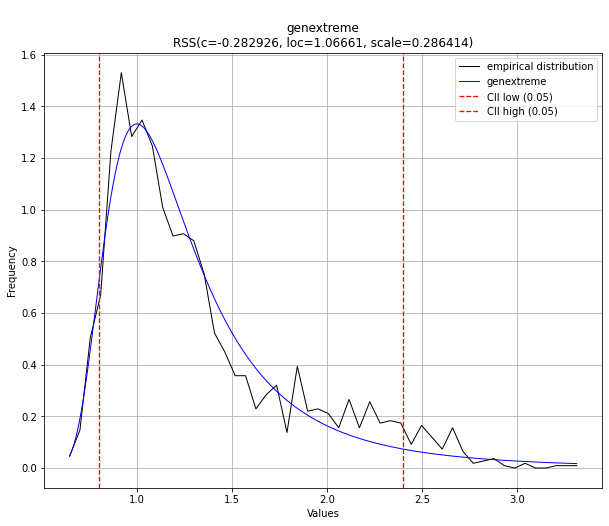

[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.2829260224762159, 1.0666068324146325, 0.286413707039763).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.2829260224762159, 1.0666068324146325, 0.286413707039763).
Inclination
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00446586] [loc=14.176 scale=11.179]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.00248894] [loc=0.078 scale=14.098]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.00199041] [loc=-1544238.746 scale=1544238.824]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.00372252] [loc=12.301 scale=9.210]
[distfit] >[t         ] [0.03 sec] [RSS: 0.00409084] [loc=12.654 scale=9.028]
[distfit] >[genextreme] [0.13 sec] [RSS: 0.00160256] [loc=8.257 scale=6.839]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.000667427] [loc=0.042 scale=9.448]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 0.0011045] [loc=-1.987 

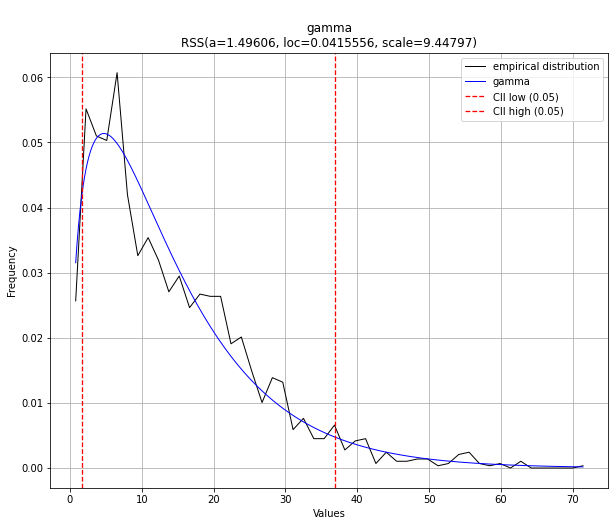

[distfit] >Generate 1000 gamma distributed samples with fitted params (1.4960558591816095, 0.04155559003231507, 9.447970992507464).
[distfit] >Generate 1000 gamma distributed samples with fitted params (1.4960558591816095, 0.04155559003231507, 9.447970992507464).
Asc Node Longitude
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.02404e-05] [loc=175.273 scale=102.229]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000109695] [loc=0.183 scale=175.091]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.000121968] [loc=-2230.988 scale=2230.846]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 7.19845e-05] [loc=167.082 scale=95.912]
[distfit] >[t         ] [0.05 sec] [RSS: 6.0218e-05] [loc=175.283 scale=102.245]
[distfit] >[genextreme] [0.11 sec] [RSS: 5.73338e-05] [loc=143.622 scale=104.204]
[distfit] >[gamma     ] [0.05 sec] [RSS: 6.02978e-05] [loc=-3736.420 scale=2.667]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 6.03505e-05

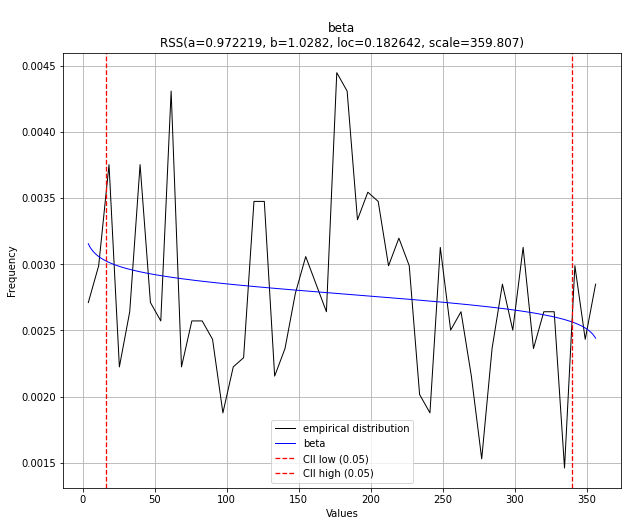

[distfit] >Generate 1000 beta distributed samples with fitted params (0.9722190027451026, 1.0282024475824718, 0.18264175333502938, 359.8069149268573).
[distfit] >Generate 1000 beta distributed samples with fitted params (0.9722190027451026, 1.0282024475824718, 0.18264175333502938, 359.8069149268573).
Orbital Period
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.21668e-05] [loc=585.079 scale=341.374]
[distfit] >[expon     ] [0.00 sec] [RSS: 9.32969e-06] [loc=176.557 scale=408.522]
[distfit] >[pareto    ] [0.03 sec] [RSS: 2.79096e-05] [loc=-0.278 scale=176.835]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 6.02685e-06] [loc=439.588 scale=226.028]
[distfit] >[t         ] [0.05 sec] [RSS: 1.22942e-05] [loc=585.379 scale=341.474]
[distfit] >[genextreme] [0.07 sec] [RSS: 5.17674e-05] [loc=179.726 scale=8.683]
[distfit] >[gamma     ] [0.02 sec] [RSS: 3.22763e-06] [loc=176.125 scale=235.611]
[distfit] >[lognorm 

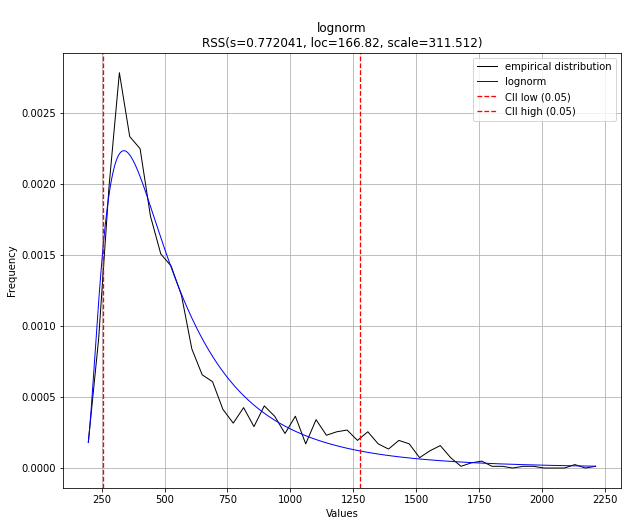

[distfit] >Generate 1000 lognorm distributed samples with fitted params (0.7720410166398348, 166.82032831759864, 311.51176263041737).
[distfit] >Generate 1000 lognorm distributed samples with fitted params (0.7720410166398348, 166.82032831759864, 311.51176263041737).
Perihelion Distance
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.38195] [loc=0.779 scale=0.247]
[distfit] >[expon     ] [0.00 sec] [RSS: 28.5863] [loc=0.119 scale=0.659]
[distfit] >[pareto    ] [0.07 sec] [RSS: 27.871] [loc=-116454242.901 scale=116454243.020]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 2.85953] [loc=0.766 scale=0.226]
[distfit] >[t         ] [0.05 sec] [RSS: 2.38194] [loc=0.779 scale=0.247]
[distfit] >[genextreme] [0.12 sec] [RSS: 2.09345] [loc=0.700 scale=0.253]
[distfit] >[gamma     ] [0.05 sec] [RSS: 2.37449] [loc=-7.517 scale=0.007]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 2.3896] [loc=-23.651 scale=24.429]
[distfit]

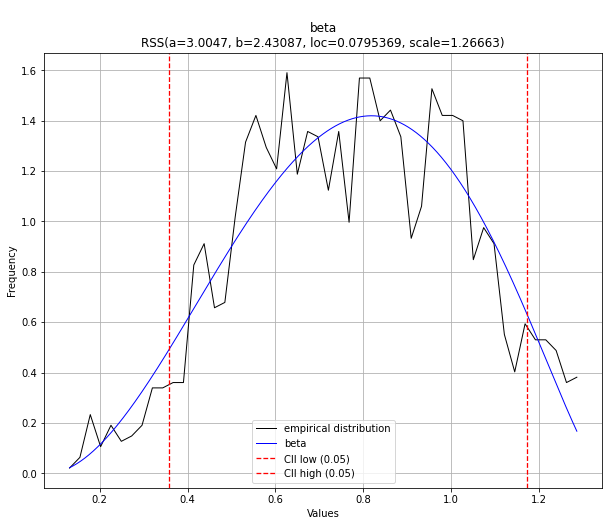

[distfit] >Generate 1000 beta distributed samples with fitted params (3.0047039363171244, 2.430873856162608, 0.07953690418938064, 1.2666316503211035).
[distfit] >Generate 1000 beta distributed samples with fitted params (3.0047039363171244, 2.430873856162608, 0.07953690418938064, 1.2666316503211035).
Perihelion Arg
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.19499e-05] [loc=185.065 scale=103.422]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000124739] [loc=0.007 scale=185.058]
[distfit] >[pareto    ] [0.02 sec] [RSS: 0.00124323] [loc=-2.339 scale=2.346]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 5.7587e-05] [loc=183.300 scale=99.507]
[distfit] >[t         ] [0.05 sec] [RSS: 6.19192e-05] [loc=185.071 scale=103.440]
[distfit] >[genextreme] [0.04 sec] [RSS: 5.31884e-05] [loc=158.462 scale=110.728]
[distfit] >[gamma     ] [0.04 sec] [RSS: 6.2218e-05] [loc=-3514.337 scale=2.902]
[distfit] >[lognorm   ] [0

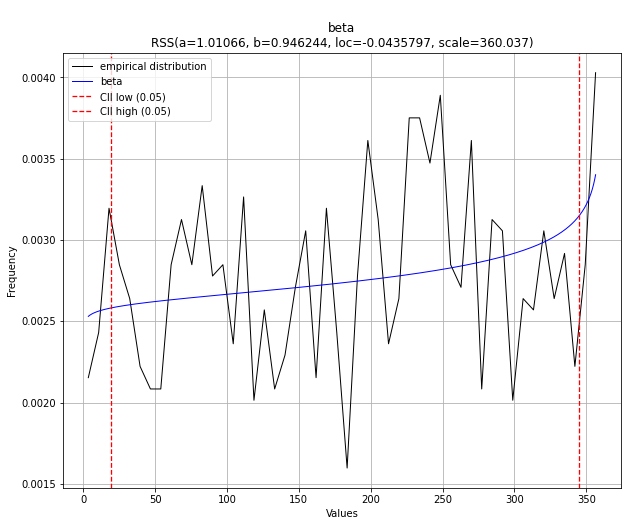

[distfit] >Generate 1000 beta distributed samples with fitted params (1.0106588575991813, 0.9462444928509495, -0.04357970464461623, 360.0366776346529).
[distfit] >Generate 1000 beta distributed samples with fitted params (1.0106588575991813, 0.9462444928509495, -0.04357970464461623, 360.0366776346529).
Aphelion Dist
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.43506] [loc=1.874 scale=0.879]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.9967] [loc=0.804 scale=1.070]
[distfit] >[pareto    ] [0.02 sec] [RSS: 3.33881] [loc=-0.314 scale=1.118]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 1.3335] [loc=1.478 scale=0.592]
[distfit] >[t         ] [0.05 sec] [RSS: 1.20288] [loc=1.497 scale=0.416]
[distfit] >[genextreme] [0.03 sec] [RSS: 0.191507] [loc=1.381 scale=0.391]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.913121] [loc=0.803 scale=0.591]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.382155] [loc=0.792 scale=0.8

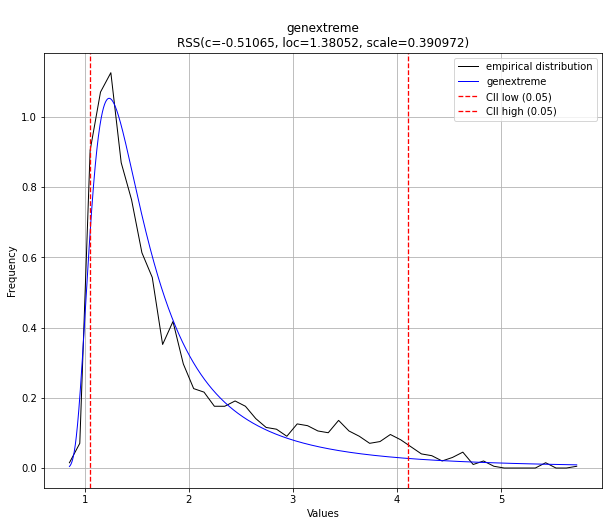

[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.5106496827402298, 1.3805247480844784, 0.3909716806328435).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.5106496827402298, 1.3805247480844784, 0.3909716806328435).
Perihelion Time
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 5.43679e-06] [loc=2457745.191 scale=1085.448]
[distfit] >[expon     ] [0.00 sec] [RSS: 7.66187e-06] [loc=2450100.317 scale=7644.874]
[distfit] >[pareto    ] [0.07 sec] [RSS: 7.66281e-06] [loc=-72.846 scale=2450173.163]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 5.35621e-06] [loc=2458044.214 scale=242.488]
[distfit] >[t         ] [0.05 sec] [RSS: 6.19074e-06] [loc=2457633.617 scale=1695.404]
[distfit] >[genextreme] [0.10 sec] [RSS: 4.63826e-06] [loc=2457628.889 scale=894.001]
[distfit] >[gamma     ] [0.07 sec] [RSS: 6.29202e-06] [loc=2448918.598 scale=349.560]
[distfit] >

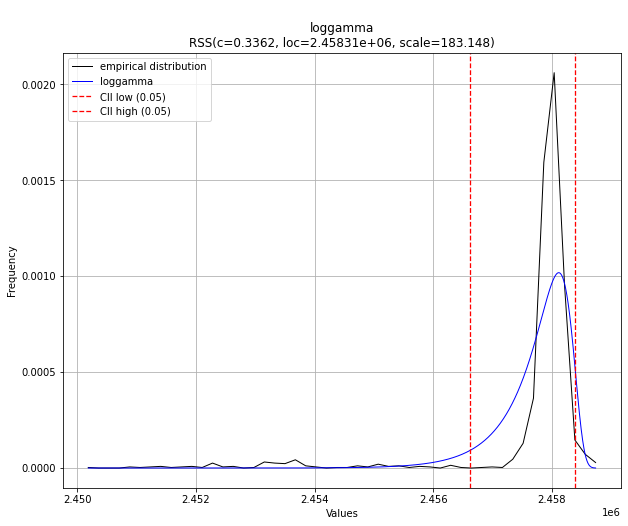

[distfit] >Generate 1000 loggamma distributed samples with fitted params (0.33620002577662617, 2458313.5594199672, 183.14849607380944).
[distfit] >Generate 1000 loggamma distributed samples with fitted params (0.33620002577662617, 2458313.5594199672, 183.14849607380944).
Mean Anomaly
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.5446e-05] [loc=183.866 scale=104.729]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000117105] [loc=0.160 scale=183.706]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.000120587] [loc=-6917025.446 scale=6917025.606]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 6.77848e-05] [loc=172.330 scale=100.762]
[distfit] >[t         ] [0.05 sec] [RSS: 6.53968e-05] [loc=183.693 scale=104.775]
[distfit] >[genextreme] [0.03 sec] [RSS: 5.73356e-05] [loc=158.567 scale=113.621]
[distfit] >[gamma     ] [0.05 sec] [RSS: 6.56807e-05] [loc=-3389.043 scale=3.077]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 6.

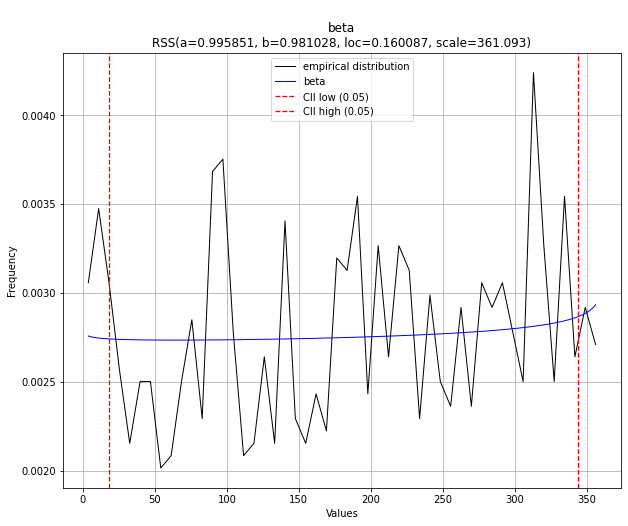

[distfit] >Generate 1000 beta distributed samples with fitted params (0.9958513158524476, 0.9810276656835728, 0.1600874334875096, 361.0928736557148).
[distfit] >Generate 1000 beta distributed samples with fitted params (0.9958513158524476, 0.9810276656835728, 0.1600874334875096, 361.0928736557148).
Mean Motion
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.3712] [loc=0.790 scale=0.345]
[distfit] >[expon     ] [0.00 sec] [RSS: 7.2299] [loc=0.161 scale=0.629]
[distfit] >[pareto    ] [0.07 sec] [RSS: 6.47479] [loc=-53132263.854 scale=53132264.015]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 1.72979] [loc=0.807 scale=0.313]
[distfit] >[t         ] [0.04 sec] [RSS: 1.37126] [loc=0.790 scale=0.345]
[distfit] >[genextreme] [0.05 sec] [RSS: 1.43982] [loc=0.652 scale=0.320]
[distfit] >[gamma     ] [0.05 sec] [RSS: 1.62274] [loc=-0.273 scale=0.118]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 1.5416] [loc=-1.317 sca

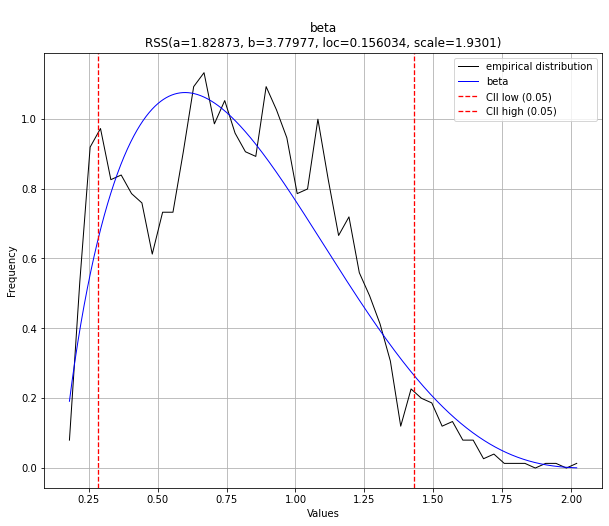

[distfit] >Generate 1000 beta distributed samples with fitted params (1.828729672115993, 3.779771096063489, 0.1560342084195621, 1.9301009255205546).
[distfit] >Generate 1000 beta distributed samples with fitted params (1.828729672115993, 3.779771096063489, 0.1560342084195621, 1.9301009255205546).
Est Dia in KM(min)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.70427] [loc=0.245 scale=0.467]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0761965] [loc=0.002 scale=0.243]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.706211] [loc=-0.130 scale=0.132]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 0.0633886] [loc=0.127 scale=0.167]
[distfit] >[t         ] [0.02 sec] [RSS: 0.286748] [loc=0.133 scale=0.116]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.184478] [loc=0.080 scale=0.091]
[distfit] >[gamma     ] [0.05 sec] [RSS: 5.8091] [loc=0.002 scale=1.537]
[distfit] >[lognorm   ] [0.02 sec] [RSS: 0.300628] [loc=-0.001 sca

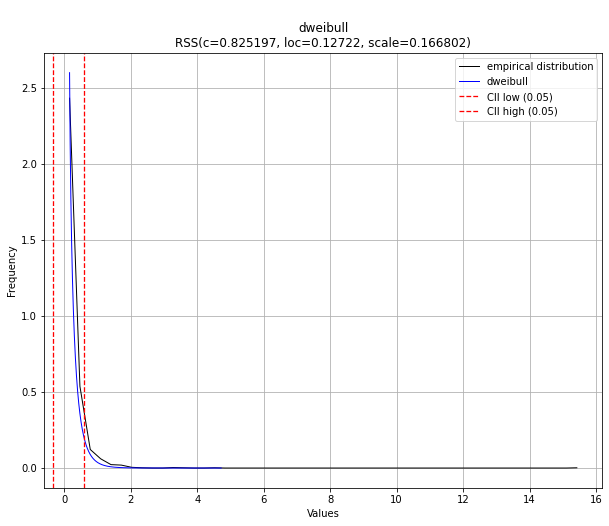

[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967700289407, 0.12721987850000002, 0.1668015388575842).
[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967700289407, 0.12721987850000002, 0.1668015388575842).
Est Dia in KM(max)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.540853] [loc=0.547 scale=1.045]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0152393] [loc=0.005 scale=0.542]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.0500198] [loc=-26.246 scale=26.251]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0126777] [loc=0.284 scale=0.373]
[distfit] >[t         ] [0.03 sec] [RSS: 0.0573382] [loc=0.297 scale=0.260]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.0368913] [loc=0.180 scale=0.204]
[distfit] >[gamma     ] [0.06 sec] [RSS: 1.17189] [loc=0.005 scale=1.537]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.0601255] [loc=-0.002 scale=0.267]
[distfit

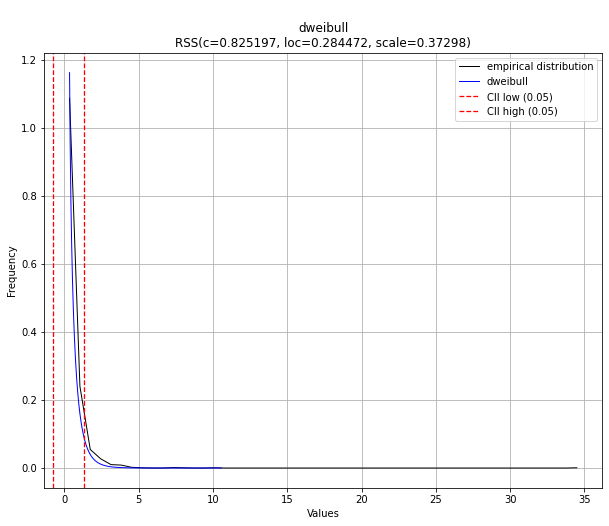

[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967694195192, 0.28447229649999994, 0.3729795788520982).
[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.8251967694195192, 0.28447229649999994, 0.3729795788520982).


In [8]:
synthetic_data = dict()
synthetic_data_drift = dict()

selected_columns = ['Absolute Magnitude', 'avg_dia', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
                    'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis',
                    'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
                    'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Est Dia in KM(min)', 'Est Dia in KM(max)']
df['avg_dia'] = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)

for column in selected_columns:
    print(column)
    results = dist.fit_transform(df.loc[:, column])
    dist.plot()
    plt.show()
    synthetic_data[column] = dist.generate(n=1000)
    if column in ['Absolute Magnitude', 'Minimum Orbit Intersection']:
        # Introduce drift in most important parameters
        results = dist.fit_transform(df.loc[:, column] * 2)
        dist.plot()
        plt.show()
    synthetic_data_drift[column] = dist.generate(n=1000)

In [9]:
synthetic_df = pd.DataFrame.from_dict(synthetic_data)
synthetic_df.describe()

,Absolute Magnitude,avg_dia,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in KM(min),Est Dia in KM(max)
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.807092,0.219383,52125.362713,4.152927e+07,7.958481e-01,0.105126,5.220675,2.457726e+06,0.383405,1.328835,...,172.964200,597.985837,0.794381,186.293091,1.997647,2.457727e+06,183.629296,0.767428,0.135046,0.296885
std,2.834671,0.445961,26815.970795,2.076914e+07,1.524566e+00,0.196820,1.187466,3.466168e+02,0.179941,0.610868,...,102.260341,387.357516,0.246486,105.556349,1.968830,6.060162e+02,103.953524,0.351133,0.285886,0.647711
min,15.275039,-2.109379,4563.225707,2.896090e+05,6.260537e-10,-0.000881,2.597437,2.454766e+06,0.006535,0.598184,...,0.382685,202.671262,0.112680,0.125486,0.914883,2.453475e+06,0.501152,0.157190,-1.707036,-3.148630
25%,19.724967,0.028424,32127.220378,2.381926e+07,7.290338e-03,0.017347,4.301007,2.457623e+06,0.250690,0.981489,...,83.000179,357.428731,0.609759,94.159243,1.277091,2.457506e+06,94.065161,0.494019,0.018360,0.045127
50%,21.573591,0.204154,48424.848608,4.240808e+07,1.416397e-01,0.040372,5.147206,2.457859e+06,0.368940,1.163008,...,168.913683,492.955835,0.812525,188.469391,1.532354,2.457864e+06,182.687471,0.719350,0.127293,0.284196
75%,23.652070,0.391243,66864.066239,5.968325e+07,8.392456e-01,0.104969,6.057523,2.457952e+06,0.503369,1.488662,...,259.565875,697.616073,0.983568,278.224330,2.052426,2.458148e+06,276.451354,0.988982,0.247031,0.513296
max,31.685967,2.870623,180950.866669,7.470131e+07,1.452847e+01,2.081014,8.504033,2.458000e+06,0.935687,7.497973,...,359.903819,4123.646149,1.287561,359.919539,35.339768,2.458647e+06,361.109014,1.858987,1.807201,4.308339


In [10]:
synthetic_df_drift = pd.DataFrame.from_dict(synthetic_data_drift)
synthetic_df_drift.describe()

,Absolute Magnitude,avg_dia,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in KM(min),Est Dia in KM(max)
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.751367,0.208257,53767.664152,4.126008e+07,7.532455e-01,0.217793,5.135674,2.457740e+06,0.377866,1.387979,...,178.030396,580.381854,0.777121,181.187996,1.955410,2.457733e+06,182.425750,0.790712,0.124932,0.306401
std,5.663904,0.454388,26239.205623,2.102958e+07,1.518098e+00,0.406377,1.204056,3.639292e+02,0.179467,0.917999,...,102.240515,347.020629,0.250667,106.115212,1.587775,6.180948e+02,105.560824,0.351875,0.262900,0.607640
min,29.266265,-2.282736,2647.544763,4.115624e+05,1.259311e-12,-0.002255,2.451728,2.455139e+06,0.021603,0.644025,...,0.943774,196.909697,0.144008,0.019893,0.882600,2.453993e+06,0.552019,0.163800,-1.086322,-3.454852
25%,39.632796,0.060361,33820.940453,2.339024e+07,8.399050e-03,0.031117,4.201365,2.457682e+06,0.241583,0.990143,...,87.719038,352.858538,0.590970,85.068756,1.251041,2.457477e+06,91.556487,0.509825,0.021979,0.071116
50%,43.558728,0.206834,50041.496784,4.232716e+07,1.350394e-01,0.085679,5.057054,2.457872e+06,0.364102,1.188224,...,184.425338,477.773179,0.781685,175.718662,1.511278,2.457899e+06,184.658029,0.742507,0.125454,0.284282
75%,47.383781,0.383526,69211.076174,6.027346e+07,7.885206e-01,0.220557,6.006954,2.457958e+06,0.499049,1.500371,...,263.105499,685.043720,0.974332,278.100115,1.998978,2.458153e+06,274.128455,1.025065,0.233258,0.534230
max,63.036111,2.559368,143675.395562,7.472137e+07,1.468984e+01,4.478641,8.407664,2.458000e+06,0.874932,16.759920,...,359.904841,3600.203220,1.313131,359.782234,19.620363,2.458632e+06,360.595799,1.881979,1.747706,3.827151


In [24]:
synthetic_df.to_csv('../data/synthetic.csv')
synthetic_df_drift.to_csv('../data/synthetic_drift.csv')

In [11]:
import requests
import time
import random
from tqdm import tqdm

print("Sending normal data")
for _ in tqdm(range(5)):
    for i in range(len(synthetic_df)):
        response = requests.post(
            url='http://127.0.0.1:8080/serve/asteroid',
            headers={'accept': 'application/json', 'Content-Type': 'application/json'},
            json=synthetic_df.loc[i, :].to_dict()
        )
        if response.status_code != 200:
            print(f"Bad request! {response.content}")
        # time.sleep(random.randint(0, 10) / 10)

print("Sending skewed data")
for _ in tqdm(range(5)):
    for i in range(len(synthetic_df_drift)):
        response = requests.post(
            url='http://127.0.0.1:8080/serve/asteroid',
            headers={'accept': 'application/json', 'Content-Type': 'application/json'},
            json=synthetic_df_drift.loc[i, :].to_dict()
        )
        if response.status_code != 200:
            print(f"Bad request! {response.content}")
        # time.sleep(random.randint(0, 10) / 10)

Sending normal data


100%|██████████| 5/5 [04:03<00:00, 48.67s/it]


Sending skewed data


 60%|██████    | 3/5 [02:27<01:39, 49.59s/it]

## Generate alert bins

In [81]:
pd.cut(df['Minimum Orbit Intersection'], 3)

0       (-0.000476, 0.159]
1           (0.159, 0.319]
2       (-0.000476, 0.159]
3       (-0.000476, 0.159]
4       (-0.000476, 0.159]
               ...        
4682    (-0.000476, 0.159]
4683    (-0.000476, 0.159]
4684    (-0.000476, 0.159]
4685        (0.159, 0.319]
4686    (-0.000476, 0.159]
Name: Minimum Orbit Intersection, Length: 4687, dtype: category
Categories (3, interval[float64, right]): [(-0.000476, 0.159] < (0.159, 0.319] < (0.319, 0.478]]

# Testing Canary Setup

In [11]:
import requests
import time
import random

for i in range(100):
    response = requests.post(
        url='http://127.0.0.1:8080/serve/asteroid_canary',
        headers={'accept': 'application/json', 'Content-Type': 'application/json'},
        json=df.loc[100, df.columns!='Hazardous'].to_dict()
    )
    print(response.json(), response.status_code)
    # time.sleep(random.randint(0, 10) / 10)

{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 0, 'y_raw': 0.1628454476594925} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 0, 'y_raw': 0.1628454476594925} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 0, 'y_raw': 0.1628454476594925} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.9601277709007263} 200
{'y': 1, 'y_raw': 0.96012777090072